In [42]:
import numpy as np
from matplotlib import pyplot as plt

In [62]:
density = 1000
x_min, x_max = (0, 1)
y_min, y_max = (-2, 2)
x = np.linspace(x_min, x_max, int((x_max-x_min)*density))
y = np.linspace(y_min, y_max, int((y_max-y_min)*density))
X, Y = np.meshgrid(x, y)

In [124]:
# draw reward meshgrid
mean = np.clip(-3 * x + 1.5, 0, 2)
mean_grid = np.clip(-3 * X + 1.5, 0, 2)

std_max = 0.2
std_min = 0.2
std = np.clip(2 * (std_min-std_max) * X + std_max, std_min, std_max)

rew = (1 / np.sqrt(2*np.pi*std**2)) * np.exp(-(Y-mean_grid)**2 / (2*std**2))
rew_max = np.max(rew, axis=0)
rew_scale = np.max(rew_max) / rew_max

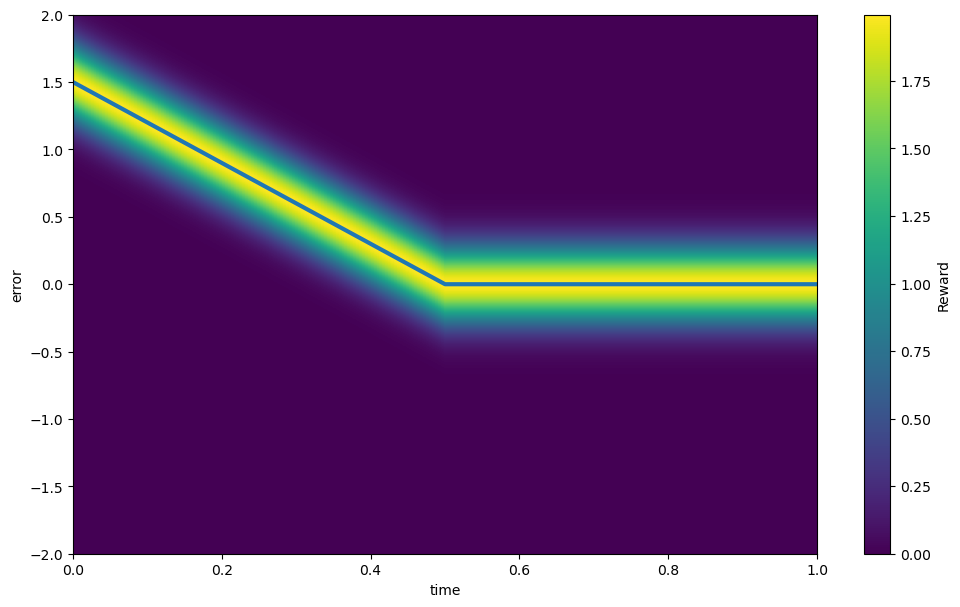

In [125]:
plt.figure(figsize=(12,7))
plt.ylim([y_min, y_max])
plt.xlim([x_min, x_max])
plt.xlabel("time")
plt.ylabel("error")

mesh = plt.pcolormesh(X, Y, rew, shading='auto', cmap='viridis', vmin=0, vmax=np.max(rew))
plt.colorbar(mesh, label="Reward")
plt.plot(x, mean, linewidth=3)